In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [77]:
data_combined = pd.read_csv('time-series-19-covid-combined.csv',parse_dates=['Date'])

In [78]:
data_combined.head()

,Date,Country/Region,Province/State,Lat,Long,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,NaN,33.93911,67.709953,0,0.0,0
1,2020-01-23,Afghanistan,NaN,33.93911,67.709953,0,0.0,0
2,2020-01-24,Afghanistan,NaN,33.93911,67.709953,0,0.0,0
3,2020-01-25,Afghanistan,NaN,33.93911,67.709953,0,0.0,0
4,2020-01-26,Afghanistan,NaN,33.93911,67.709953,0,0.0,0


In [79]:
data_combined.columns

Index(['Date', 'Country/Region', 'Province/State', 'Lat', 'Long', 'Confirmed',
       'Recovered', 'Deaths'],
      dtype='object')

In [80]:
data_combined.rename(columns={'Country/Region':'Country','Province/State':'State'},inplace=True)

In [81]:
data_combined.columns
print(data_combined.dtypes)

df = data_combined

Date         datetime64[ns]
Country              object
State                object
Lat                 float64
Long                float64
Confirmed             int64
Recovered           float64
Deaths                int64
dtype: object


In [82]:
# #check if date column in datetime format
# df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# # Check for errors in the conversion
# if df['Date'].isnull().any():
#     print("There were errors in converting 'Date' to datetime format.")
# else:
#     print("The 'Date' column is in datetime format.")

# #print(df['Date'])

Different Countries Available:

In [83]:
countries = df['Country'].unique()

Total Confirmed Cases for each country:

In [84]:
country_cases = df.groupby('Country').agg({'Confirmed':'max'})

country_cases = country_cases.sort_values(by = 'Confirmed',ascending=False).reset_index()

In [85]:
plt.rc(
    "figure",
    autolayout=True,
    figsize=(10, 6),
    titlesize=12,
    # titleweight='bold',
)
plt.rc(
    "axes",
    # labelweight="bold",
    labelsize="medium",
    # titleweight="bold",
    titlesize=12,
    titlepad=10,
)

%config InlineBackend.figure_format = 'retina'

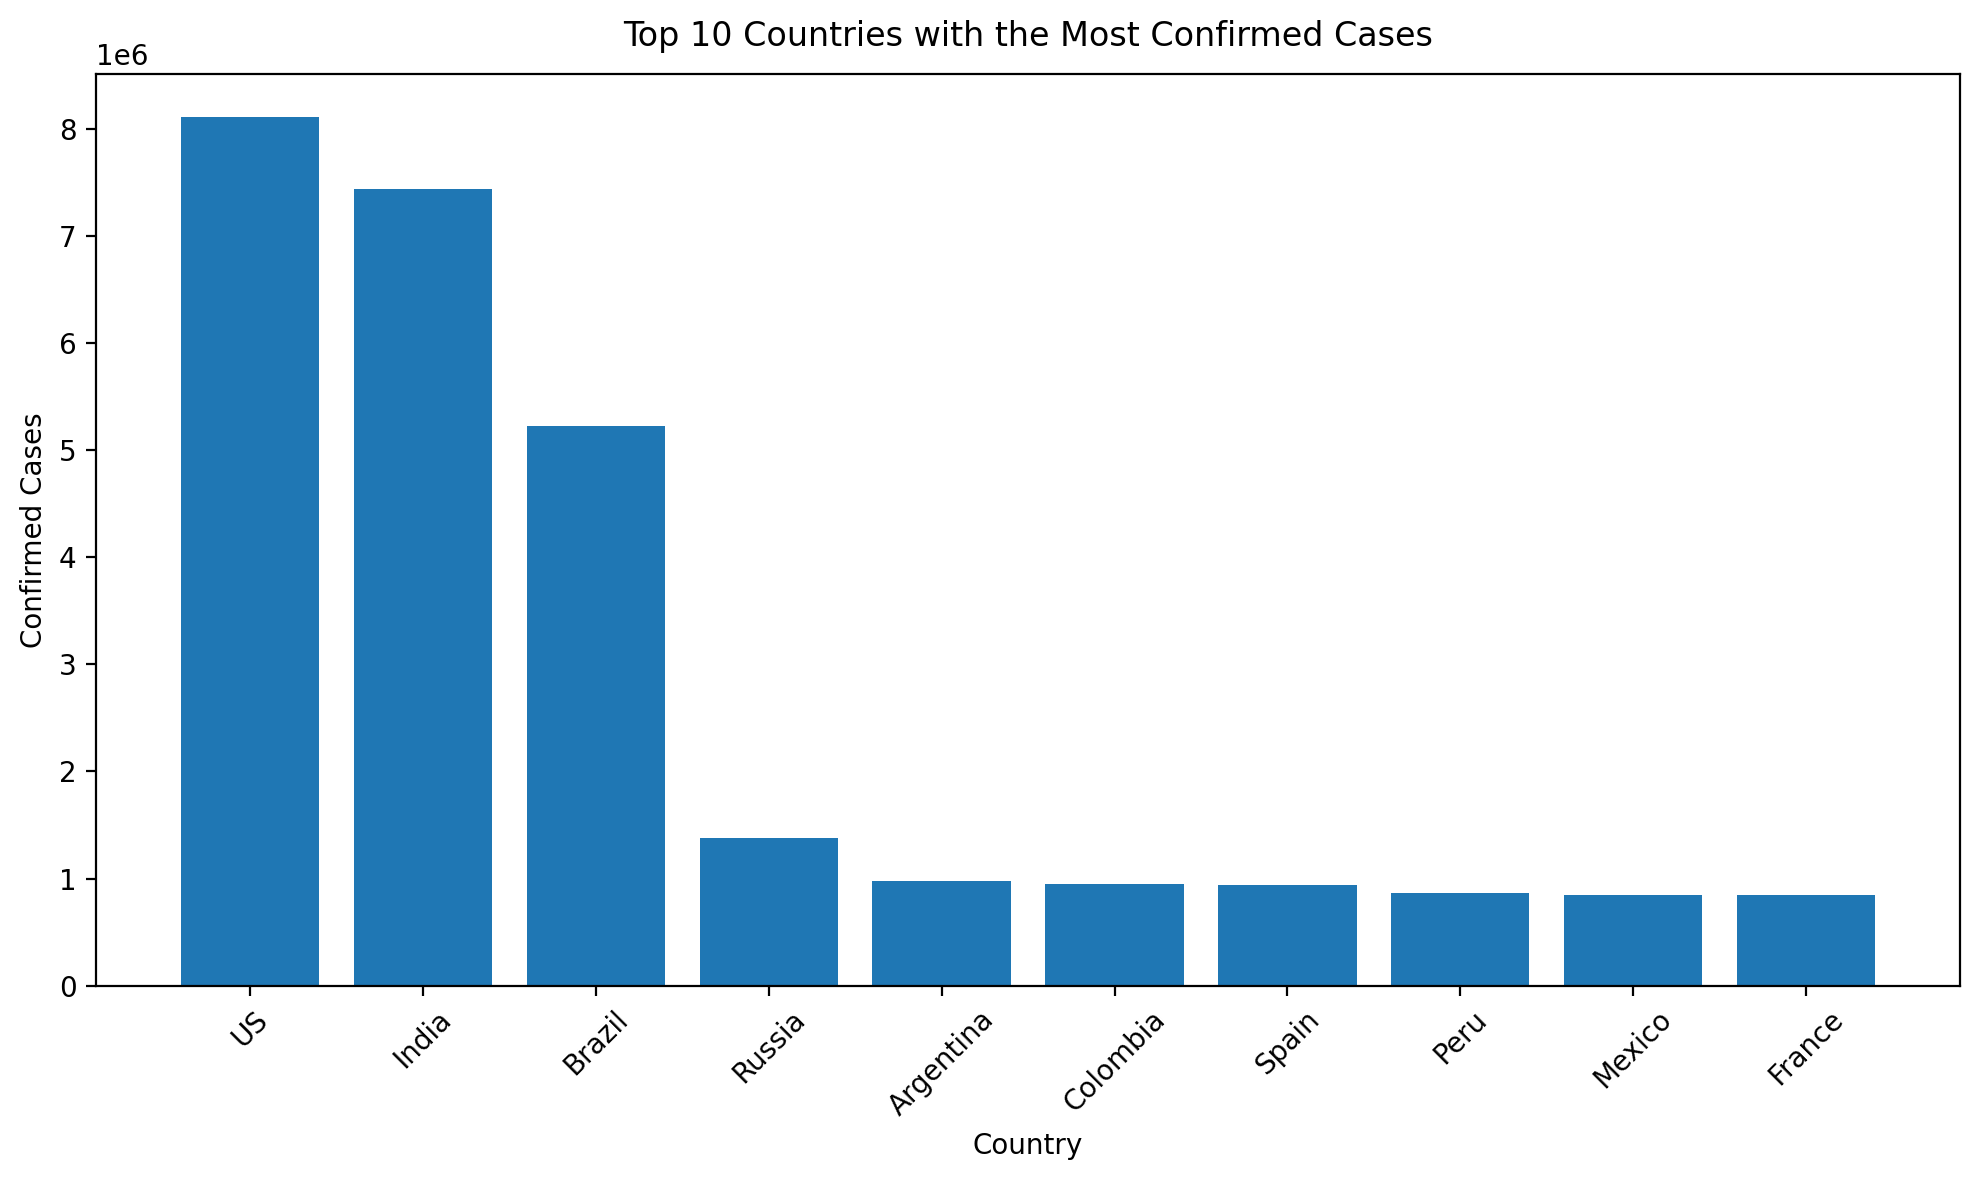

In [86]:
plt.bar(country_cases[:10]['Country'],country_cases[:10]['Confirmed'])
plt.xlabel('Country')
plt.xticks(rotation= 45)
plt.ylabel('Confirmed Cases')
plt.title('Top 10 Countries with the Most Confirmed Cases')
plt.show()

Picking USA for our work:

In [87]:
df_usa = df[df['Country']=='US']
df_usa.head(5)

df_usa = df_usa.set_index('Date')


In [88]:
df_usa.drop(columns=['State','Country','Lat','Long'],inplace=True)

df_usa

,Confirmed,Recovered,Deaths
Date,,,
2020-01-22,1,0.0,0
2020-01-23,1,0.0,0
2020-01-24,2,0.0,0
2020-01-25,2,0.0,0
2020-01-26,5,0.0,0
...,...,...,...
2020-10-13,7856605,3124593.0,215887
2020-10-14,7916099,3155794.0,216872
2020-10-15,7979709,3177397.0,217692


Total 270 Days of Data!

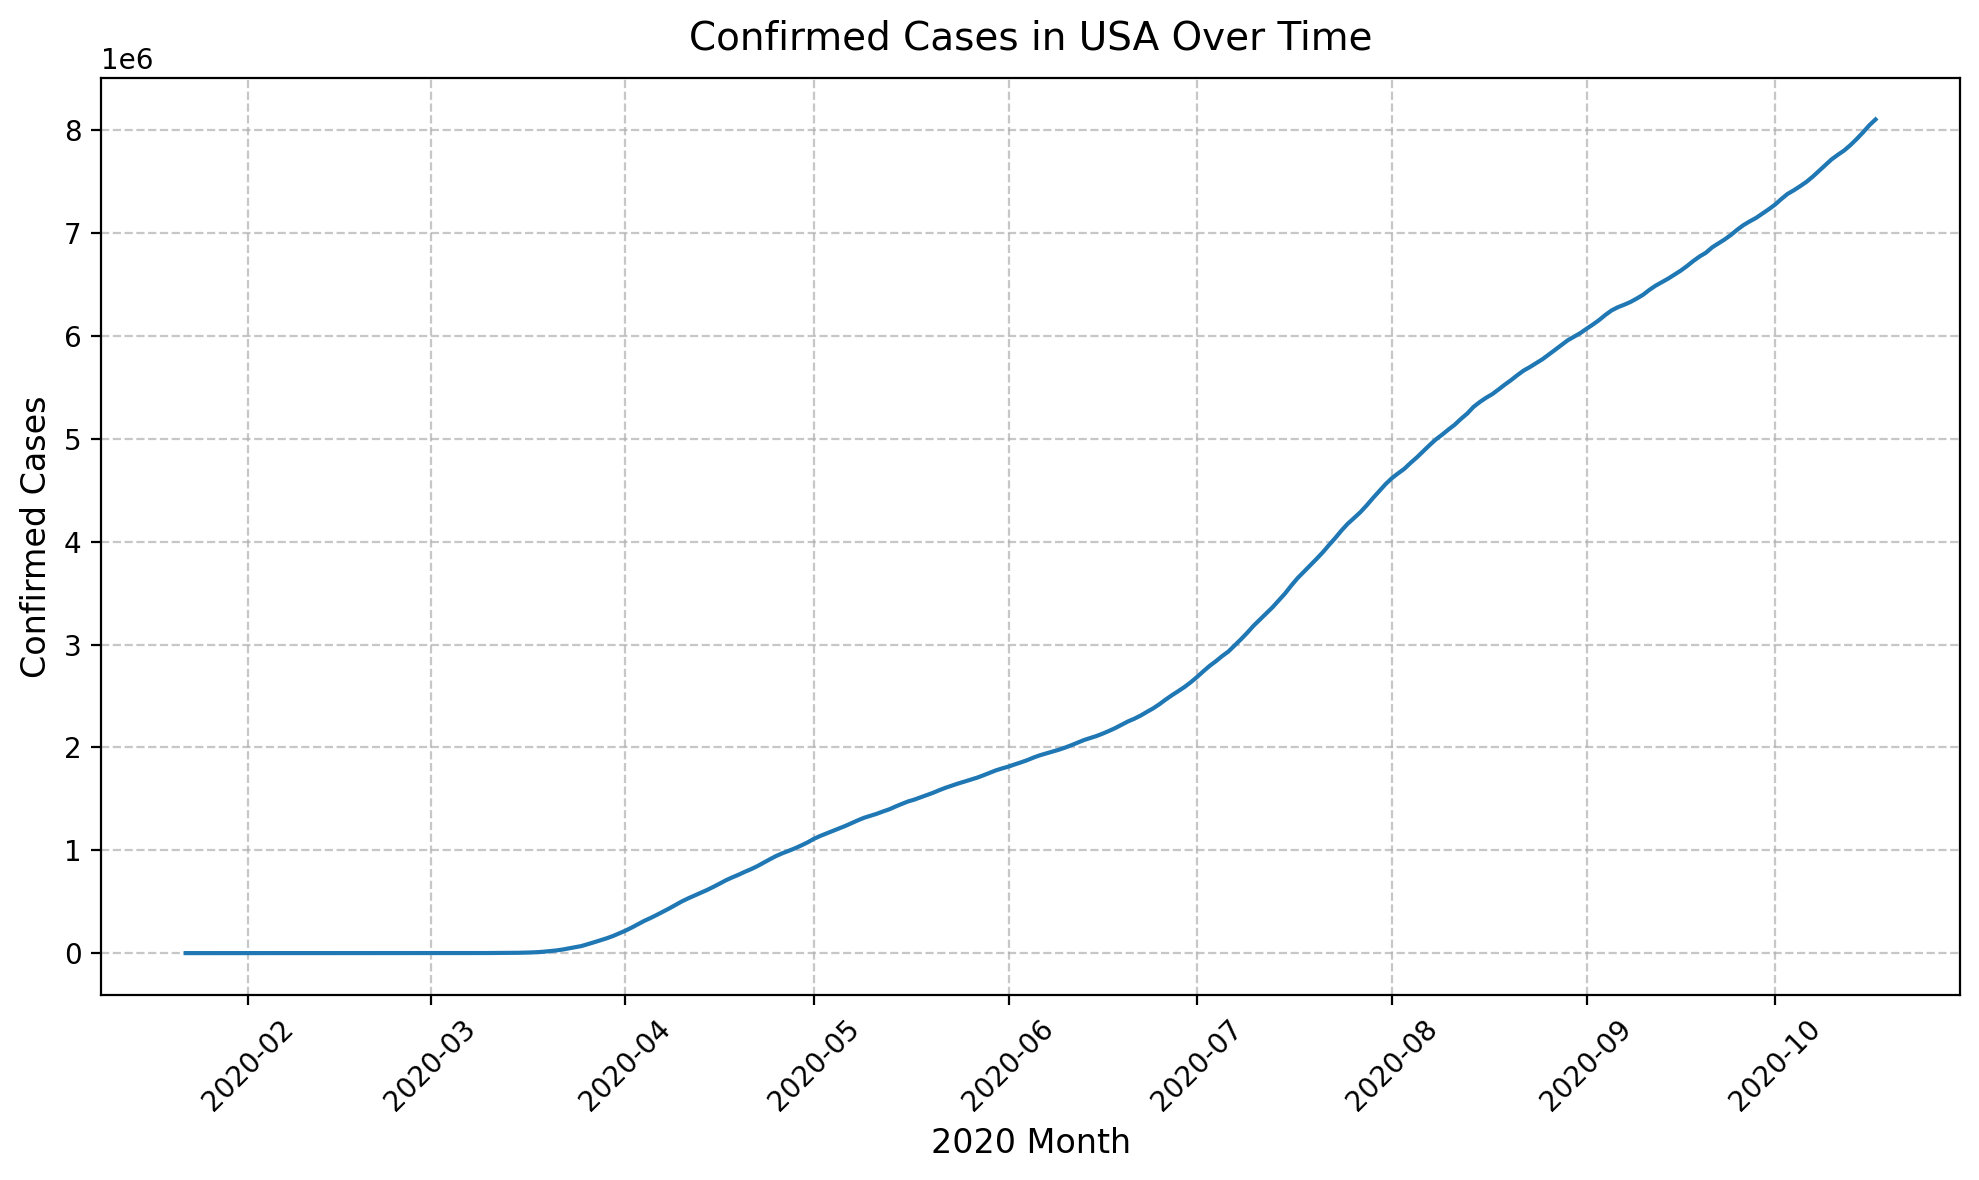

In [89]:
plt.plot(df_usa.index,df_usa['Confirmed'],'-')
plt.title('Confirmed Cases in USA Over Time', fontsize=14)
plt.xlabel('2020 Month', fontsize=12)
plt.xticks(rotation = 45)
plt.ylabel('Confirmed Cases', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)


### Some Time Series Operations:

In [90]:
#Time Column starting from 1st recorded day
df_usa['Time'] = np.arange(len(df_usa.index))
df_usa.head(5)

,Confirmed,Recovered,Deaths,Time
Date,,,,
2020-01-22,1,0.0,0,0
2020-01-23,1,0.0,0,1
2020-01-24,2,0.0,0,2
2020-01-25,2,0.0,0,3
2020-01-26,5,0.0,0,4


In [91]:
# plt.plot(df_usa.Time,df_usa.Confirmed,'-')
df_usa['2020-01-22':'2020-02-01']

,Confirmed,Recovered,Deaths,Time
Date,,,,
2020-01-22,1,0.0,0,0
2020-01-23,1,0.0,0,1
2020-01-24,2,0.0,0,2
2020-01-25,2,0.0,0,3
2020-01-26,5,0.0,0,4
2020-01-27,5,0.0,0,5
2020-01-28,5,0.0,0,6
2020-01-29,6,0.0,0,7
2020-01-30,6,0.0,0,8


In [105]:
df_usa.resample('M').max()

,Confirmed,Recovered,Deaths,Time,Confirmed_diff,Confirmed_diff2
Date,,,,,,
2020-01-31,8,0.0,0,9,3.0,3.0
2020-02-29,25,7.0,1,38,8.0,8.0
2020-03-31,192091,7024.0,5252,69,26363.0,5860.0
2020-04-30,1076689,153947.0,65930,99,34648.0,4573.0
2020-05-31,1796645,444758.0,107614,130,34220.0,6342.0
2020-06-30,2633871,720631.0,127753,160,46163.0,6071.0
2020-07-31,4559711,1438160.0,154047,191,77362.0,15506.0
2020-08-31,6028642,2184825.0,183616,222,64601.0,12630.0
2020-09-30,7233042,2840688.0,206932,252,52464.0,16250.0


To make the data stationary:\
First Order Difference

In [93]:
df_usa['Confirmed_diff'] = df_usa['Confirmed'] - df_usa['Confirmed'].shift(1)
df_usa.dropna(inplace=True)

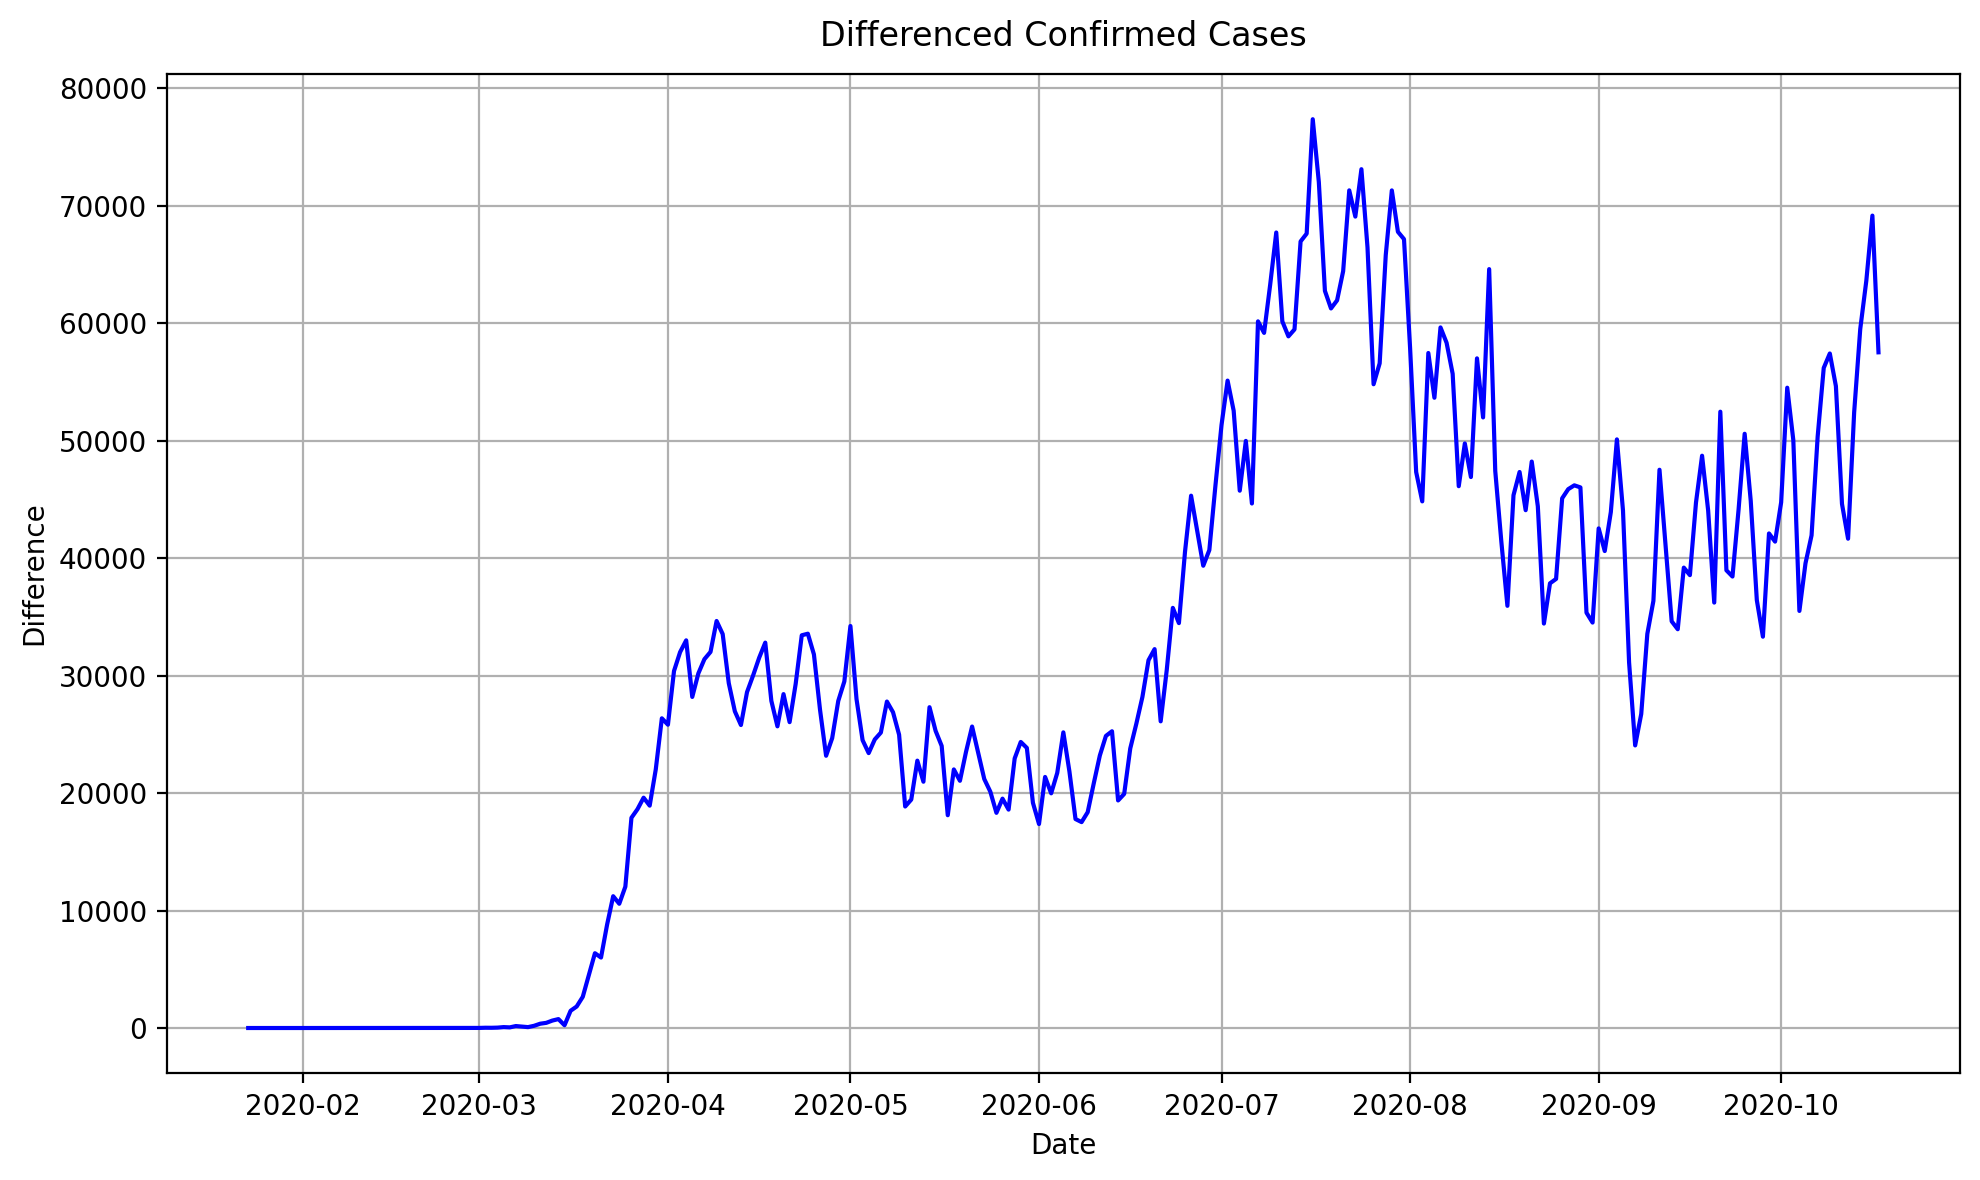

In [94]:
plt.plot(df_usa.index, df_usa['Confirmed_diff'], color='blue')
plt.title('Differenced Confirmed Cases')
plt.xlabel('Date')
plt.ylabel('Difference')
plt.grid(True)
plt.show()

Second Order Difference:

In [95]:
# Compute the second-order difference
df_usa['Confirmed_diff2'] = df_usa['Confirmed_diff'] - df_usa['Confirmed_diff'].shift(1)

# Remove NaN values resulting from differencing
df_usa.dropna(inplace=True)

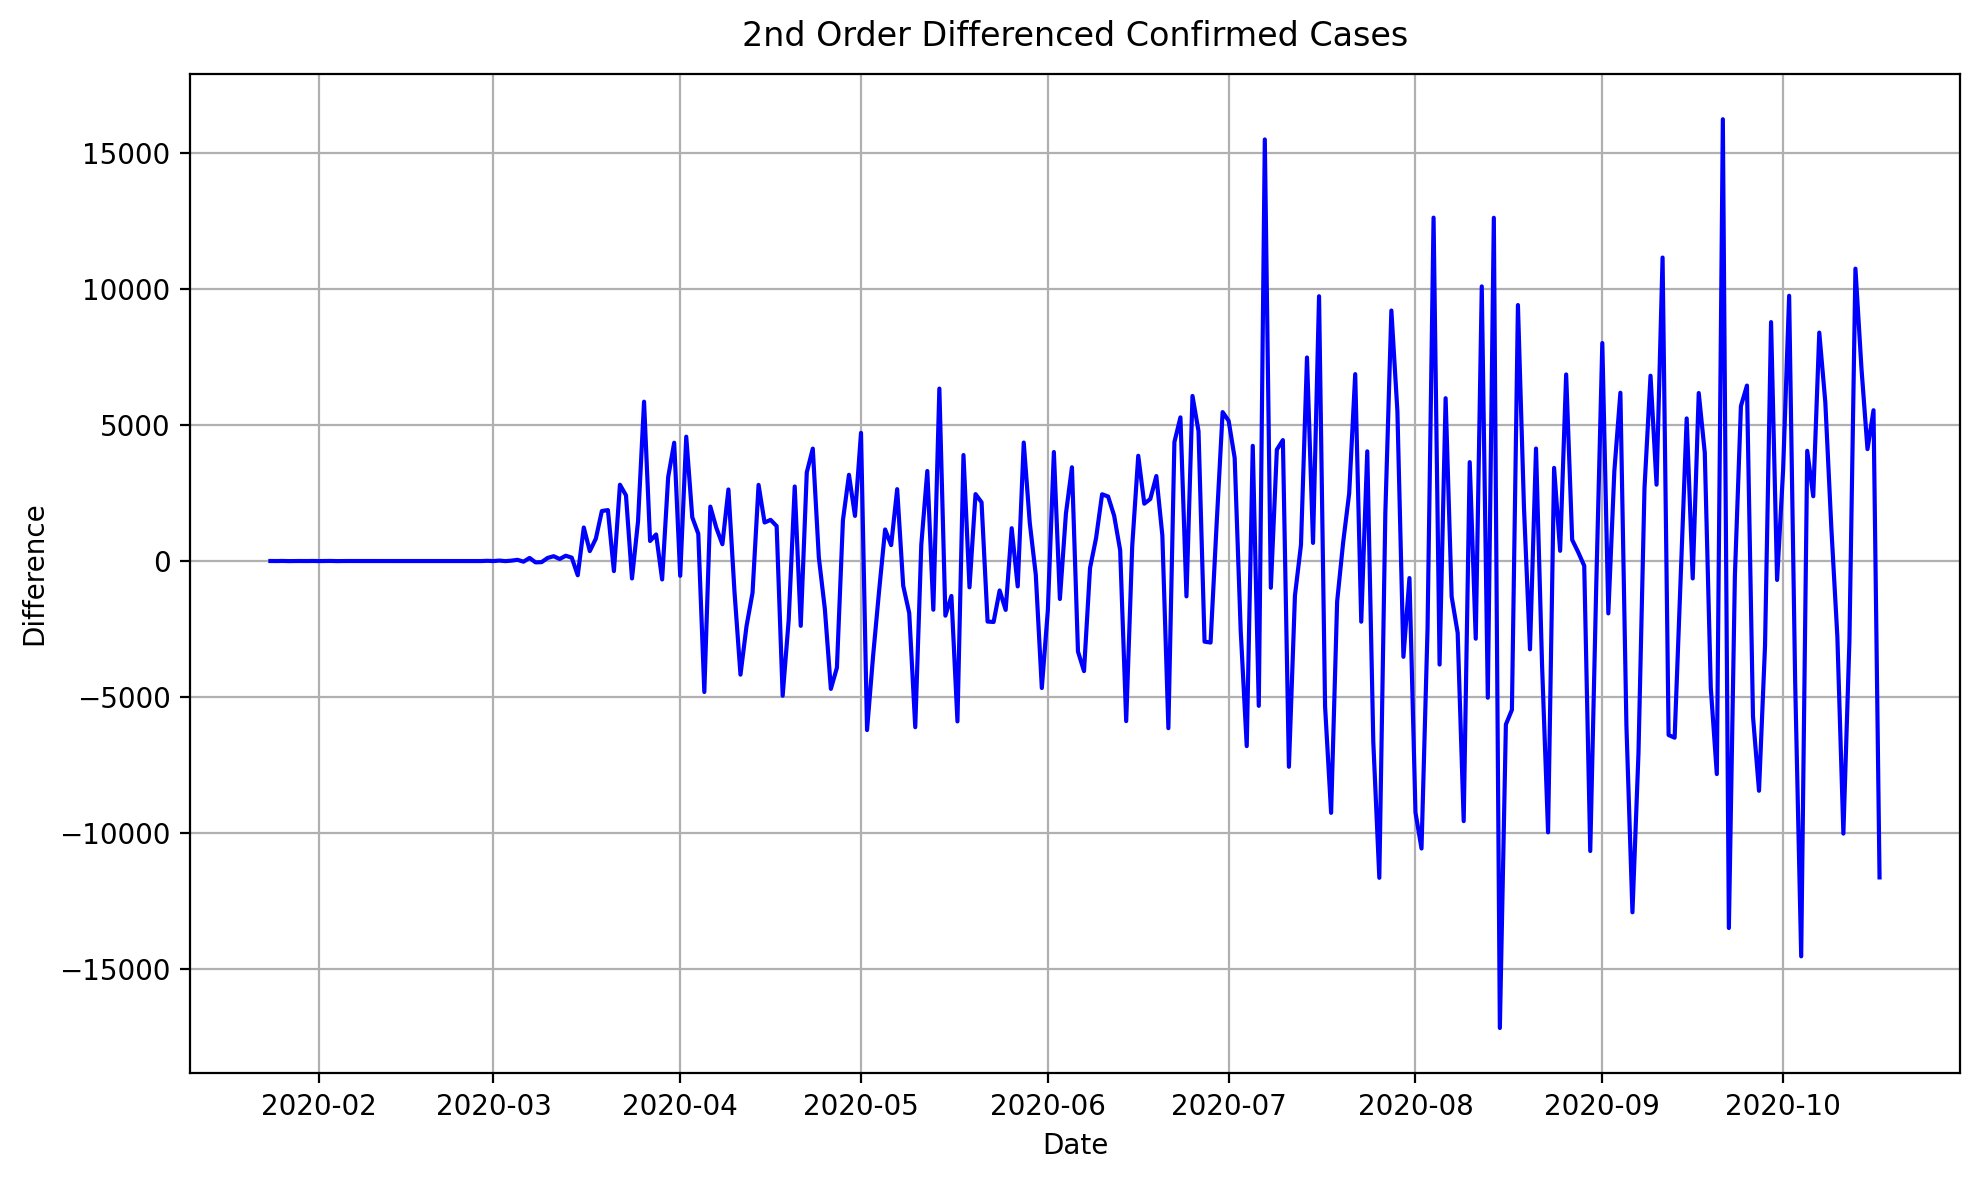

In [96]:
plt.plot(df_usa.index, df_usa['Confirmed_diff2'], color='blue')
plt.title('2nd Order Differenced Confirmed Cases')
plt.xlabel('Date')
plt.ylabel('Difference')
plt.grid(True)
plt.show()

Auto Correlation Plots

<Figure size 1000x600 with 0 Axes>

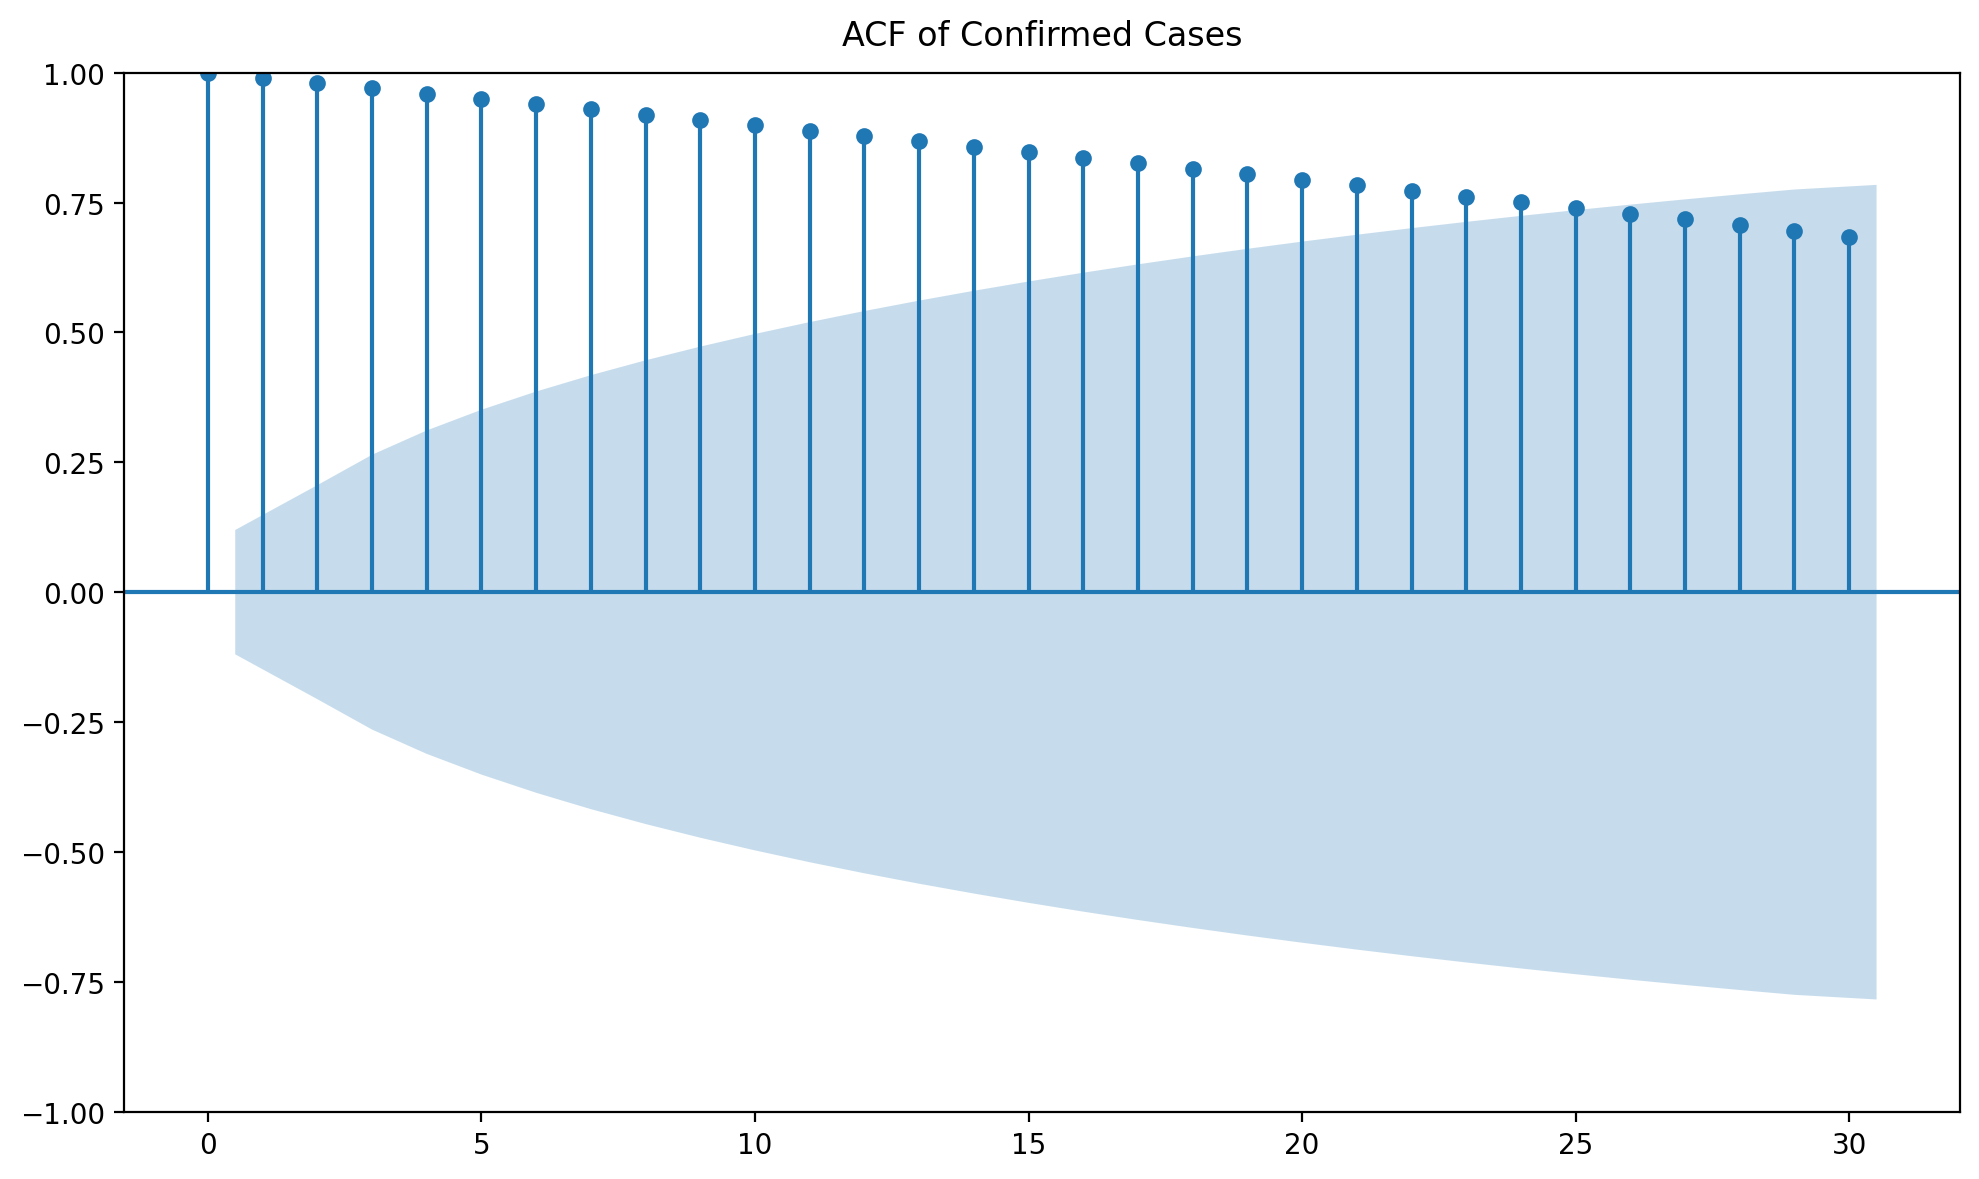

In [97]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(10, 6))
plot_acf(df_usa['Confirmed'], lags=30, title='ACF of Confirmed Cases')
plt.show()

# plt.figure(figsize=(10, 6))
# plot_pacf(df_usa['Confirmed_diff'], lags=10, title='PACF of Differenced Series')
# plt.show()


no seasonality,\
auto correlation decreases as time lag increases, clear trend for nearby data points


<Figure size 1000x600 with 0 Axes>

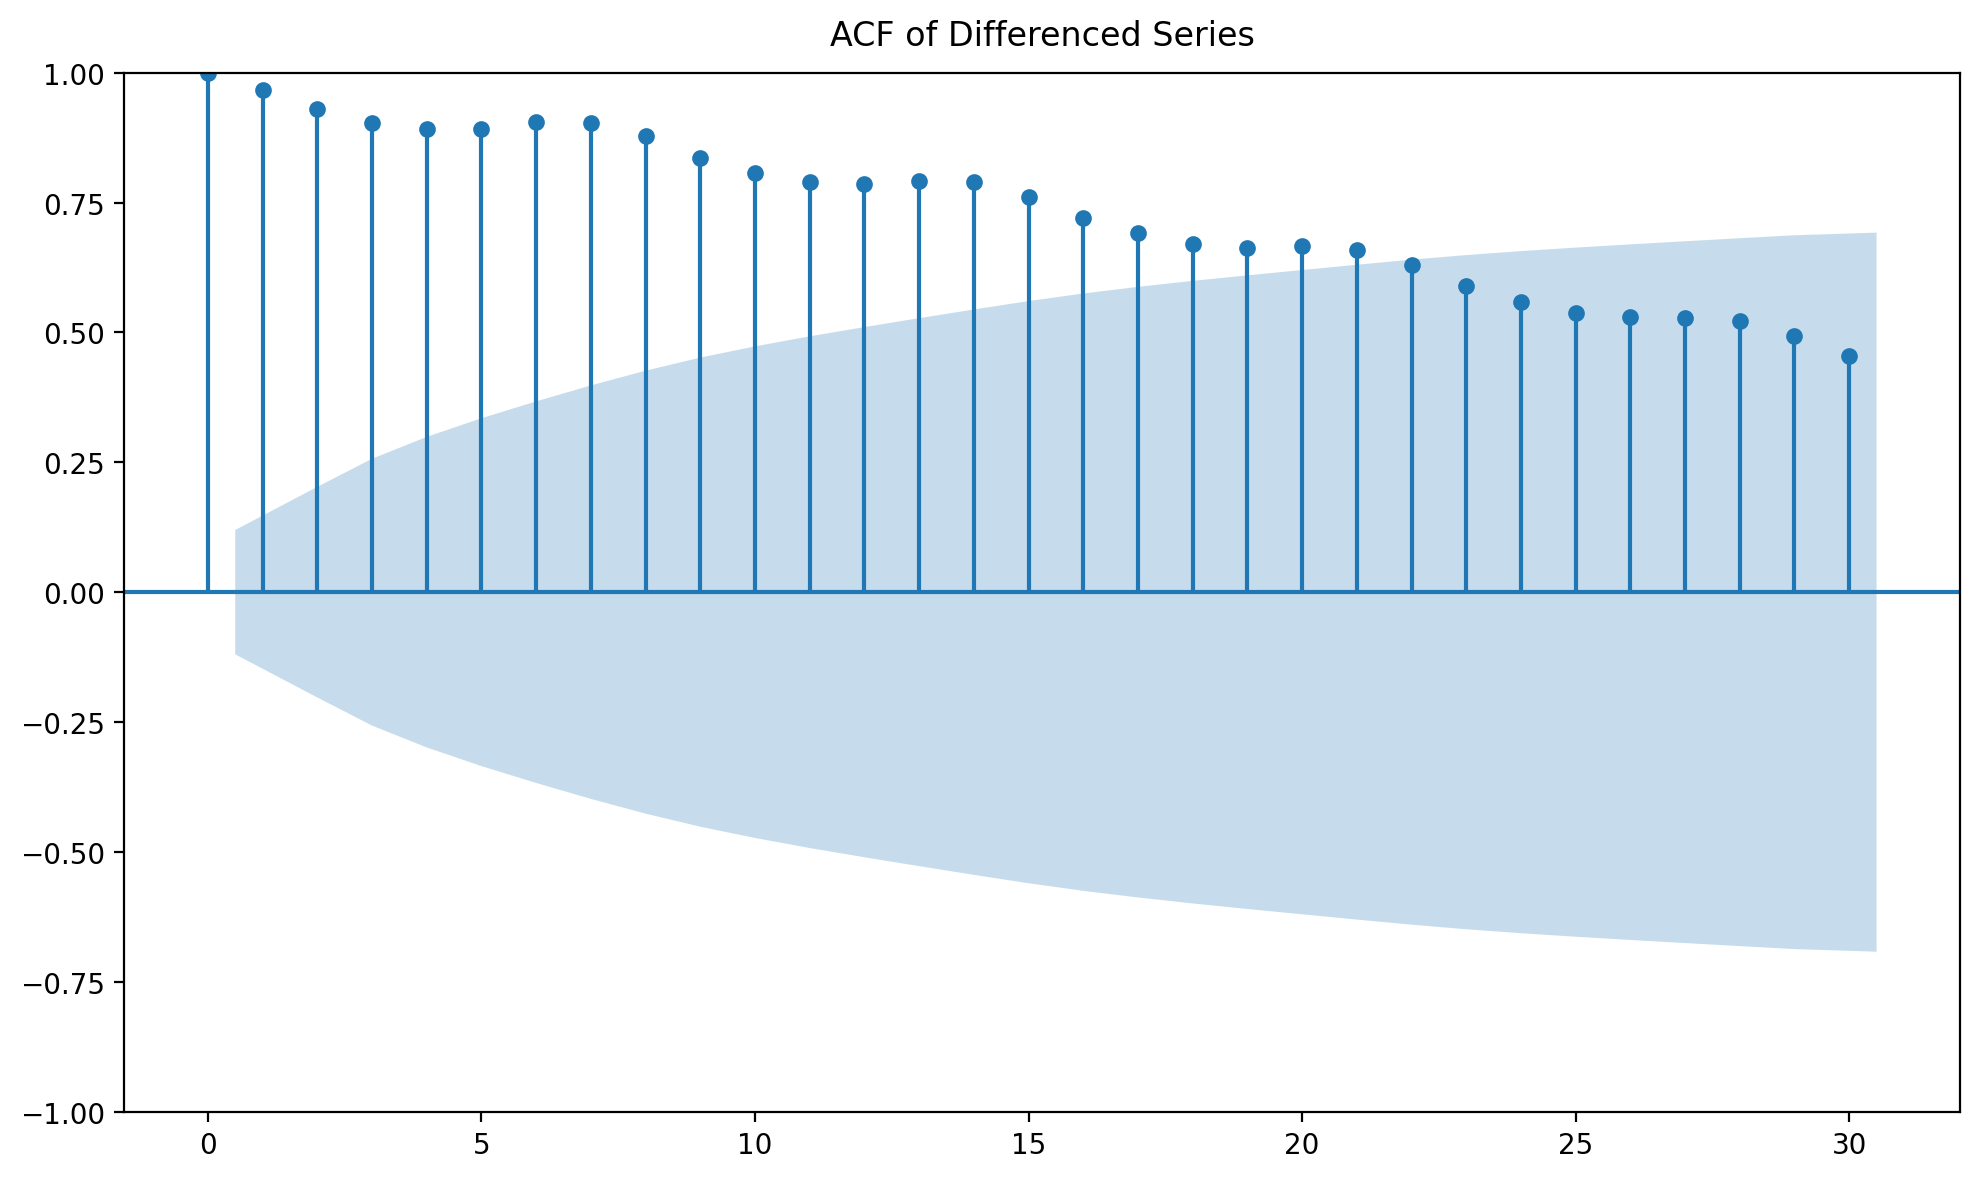

In [98]:
plt.figure(figsize=(10, 6))
plot_acf(df_usa['Confirmed_diff'], lags=30, title='ACF of Differenced Series')
plt.show()

<Figure size 1000x600 with 0 Axes>

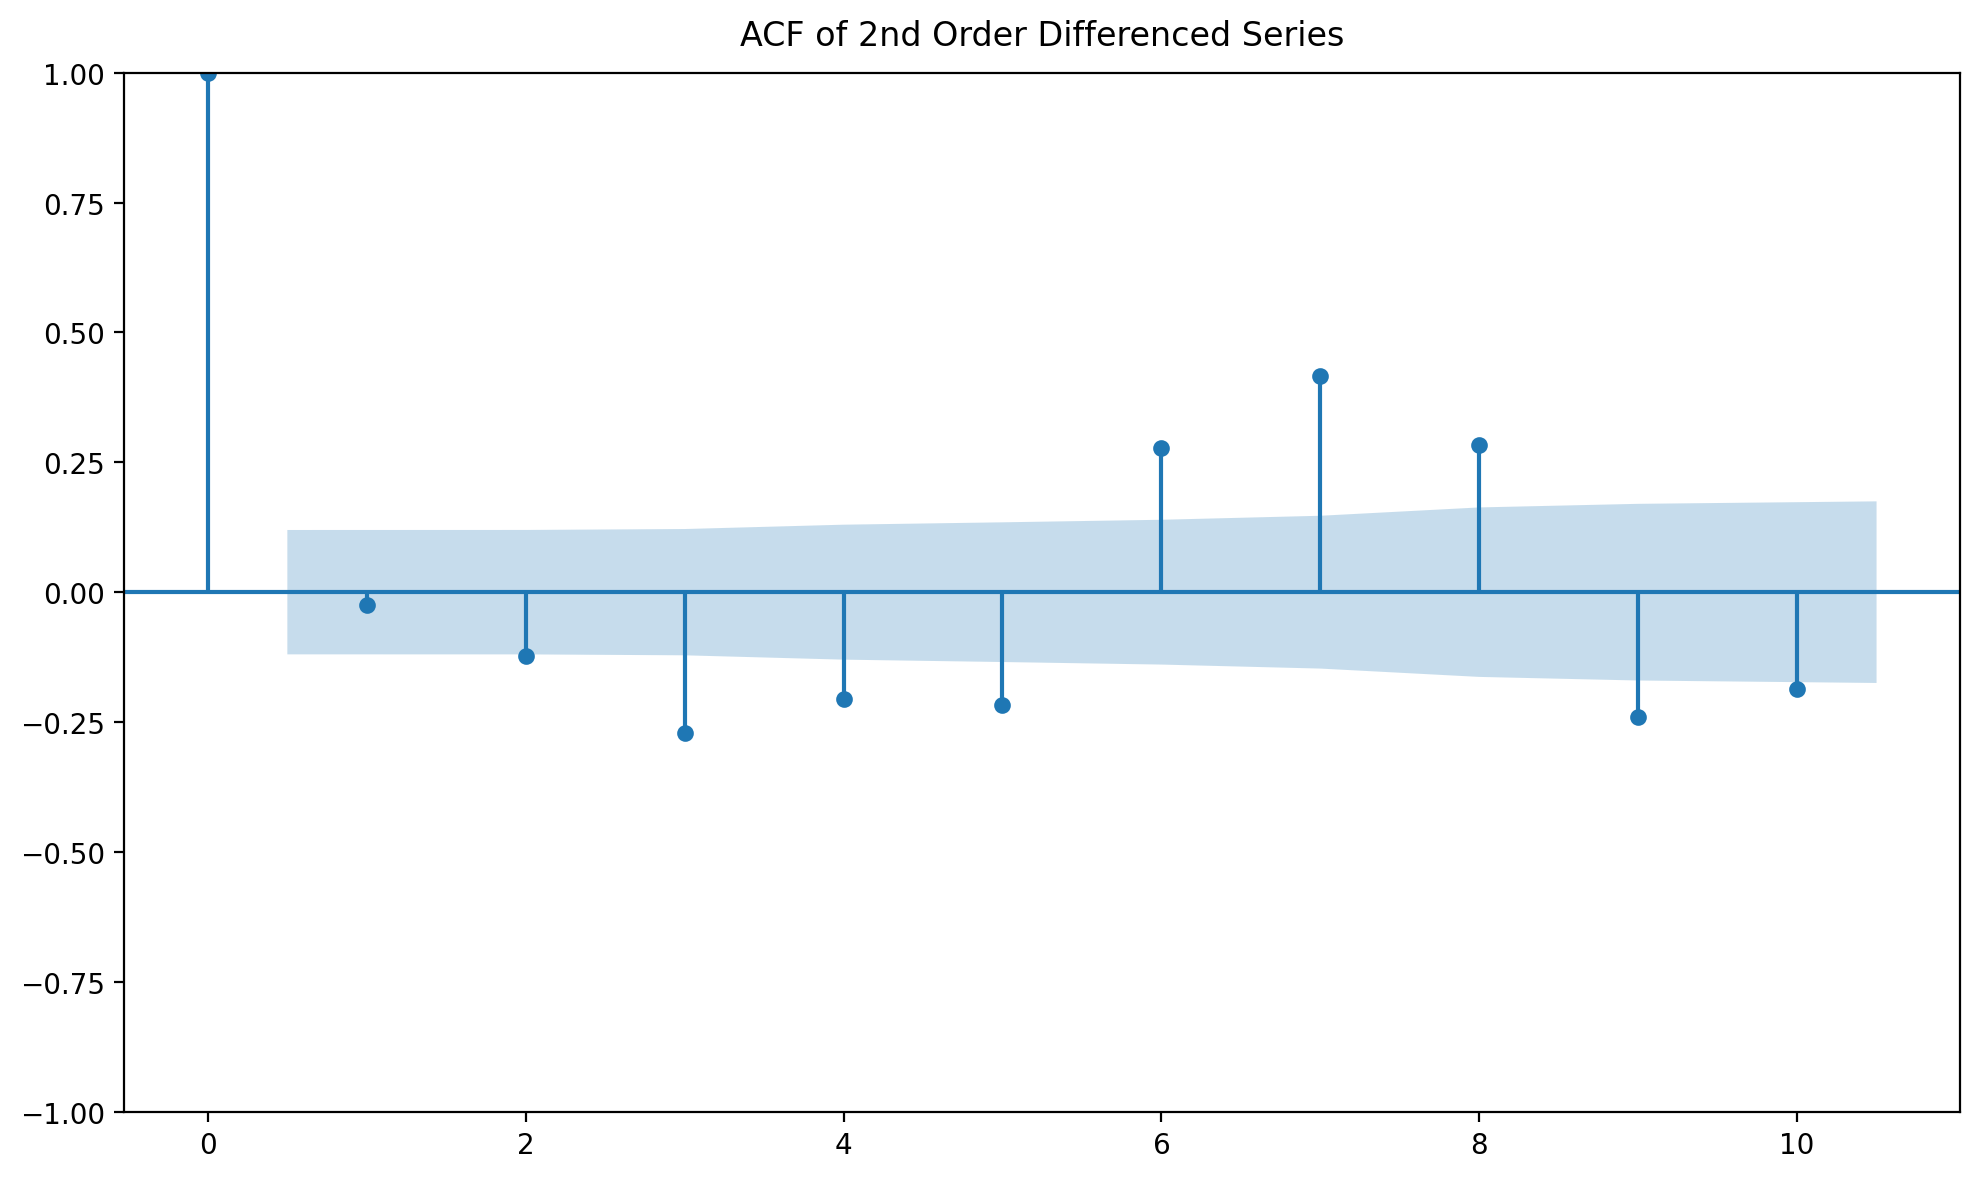

In [99]:
plt.figure(figsize=(10, 6))
plot_acf(df_usa['Confirmed_diff2'], lags=10, title='ACF of 2nd Order Differenced Series')
plt.show()

Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test to check for stationarity in a time series dataset

In [100]:
from statsmodels.tsa.stattools import kpss

# Perform KPSS test on the time series data
kpss_stat, p_value, lags, crit_values = kpss(df_usa['Confirmed'])

# Print the results
print('KPSS Statistic:', kpss_stat)
print('p-value:', p_value)

KPSS Statistic: 2.4263591361572847
p-value: 0.01


/tmp/ipykernel_5126/1004092871.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_stat, p_value, lags, crit_values = kpss(df_usa['Confirmed'])


In [101]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test on the time series data
adf_stat, p_value, used_lags, nobs, crit_values, ic_best = adfuller(df_usa['Confirmed'])

# Print the results
print('ADF Statistic:', adf_stat)
print('p-value:', p_value)
print('Used Lag:', used_lags)
print('Number of Observations:', nobs)
print('Critical Values:', crit_values)
print('Information Criterion:', ic_best)


ADF Statistic: 1.753832858760971
p-value: 0.9982529190561126
Used Lag: 16
Number of Observations: 251
Critical Values: {'1%': -3.4566744514553016, '5%': -2.8731248767783426, '10%': -2.5729436702592023}
Information Criterion: 4815.814789487765


In [102]:
adf_stat, p_value, used_lags, nobs, crit_values, ic_best = adfuller(df_usa['Confirmed_diff'])

# Print the results
print('ADF Statistic:', adf_stat)
print('p-value:', p_value)
print('Used Lag:', used_lags)
print('Number of Observations:', nobs)
print('Critical Values:', crit_values)
print('Information Criterion:', ic_best)

ADF Statistic: -1.6819833467272318
p-value: 0.44041828564221014
Used Lag: 15
Number of Observations: 252
Critical Values: {'1%': -3.4565688966099373, '5%': -2.8730786194395455, '10%': -2.5729189953388762}
Information Criterion: 4817.106663452473


In [103]:
adf_stat, p_value, used_lags, nobs, crit_values, ic_best = adfuller(df_usa['Confirmed_diff2'])

# Print the results
print('ADF Statistic:', adf_stat)
print('p-value:', p_value)
print('Used Lag:', used_lags)
print('Number of Observations:', nobs)
print('Critical Values:', crit_values)
print('Information Criterion:', ic_best)

ADF Statistic: -2.7271849852855032
p-value: 0.06945105401959312
Used Lag: 14
Number of Observations: 253
Critical Values: {'1%': -3.4564641849494113, '5%': -2.873032730098417, '10%': -2.572894516864816}
Information Criterion: 4818.165208059602


with the ADF test we can reject the null hypothesis of dataset for 2nd Order Difference being a Non-Stationary Data with good amount of confidence.

/home/vibhavp20/anaconda3/envs/math_model/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/vibhavp20/anaconda3/envs/math_model/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/vibhavp20/anaconda3/envs/math_model/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/vibhavp20/anaconda3/envs/math_model/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


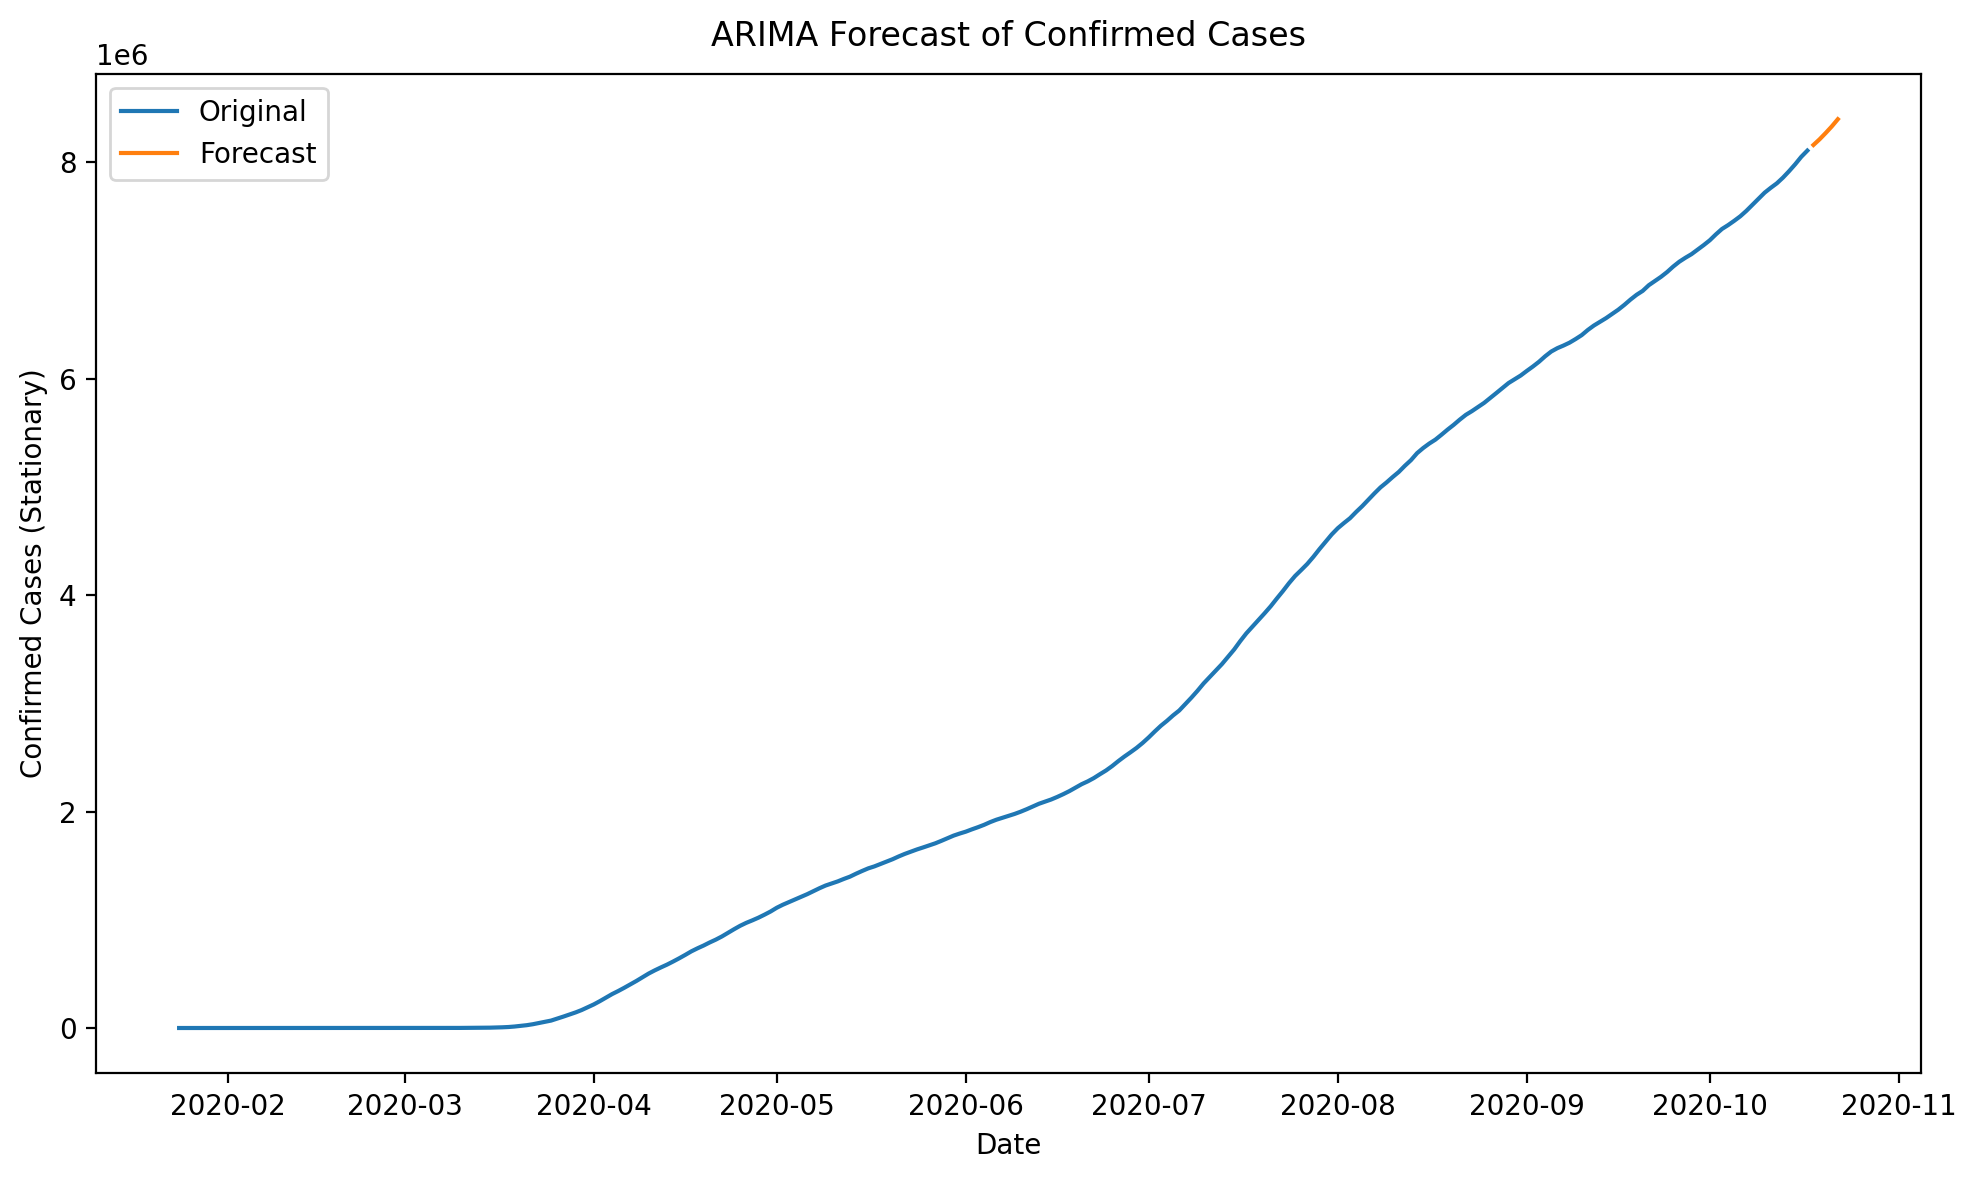

In [108]:
from statsmodels.tsa.arima.model import ARIMA

# Define and fit ARIMA model
model = ARIMA(df_usa['Confirmed'], order=(1, 2, 15))
results = model.fit()

# Print model summary
forecast = results.forecast(steps=5)  # Adjust steps for the number of days you want to forecast

# Plot the original series and forecast
plt.plot(df_usa.index, df_usa['Confirmed'], label='Original')
plt.plot(forecast.index, forecast.values, label='Forecast')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases (Stationary)')
plt.title('ARIMA Forecast of Confirmed Cases')
plt.legend()
plt.show()